In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

print(tf.__version__) 

Found GPU at: 
2.2.0


In [3]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [4]:
from IPython.display import clear_output

In [5]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

def resize( img, scale_percent= 60, verbose=False):
  #scale_percent = 60 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  if verbose:
    print( "scale", scale_percent)
    print( "dim", dim)
  # resize image
  return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [9]:
#
# parte 1 - faz split da imagem original e gera um arquivo para cada jogada
#

count= 3000;
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1"
def split( img):
#     print( img.shape) #esperado (2480, 3504, 3)
    h= 2230+50
    w= 1545+10
    
    img1= img[115:113+h, 145:145+w]
    img2= img[130:130+h, 1860:1860+w]
    
    # esperado 
    return img1, img2

def split_and_save( tag, file):
    global count
    img= cv2.imread( file)
    img= cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img1, img2= split( img)
    
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_L_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img1)
    fname= os.path.join( output_folder, "9999_"+str(count).zfill(4)+"_R_"+ tag+"_"+ Path( file).name)
    count+= 1
    write_image( fname, img2)
    if( count%100== 0 or count%100== 1):
        print( count, "...")
    
for tag,folder in [
    ("part3", "C:/mestrado/datasets/handmade/imagens-originais/scanned_images-part3-rep2")]:
    
    files= glob( os.path.join( folder, "*.jpg"))
    for f in files:
        split_and_save( tag, f)

In [6]:
import time

In [7]:
import shutil

In [ ]:
tessdata_dir_config = r'--tessdata-dir "C:\Program Files\Tesseract-OCR"'
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [ ]:
show( img)

In [ ]:
pytesseract.image_to_string(img)

In [ ]:
files= glob( os.path.join( output_folder, "9999*.jpg"))


In [ ]:
files[0]

In [ ]:
shutil.move( files[0], 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')

Salvo como C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1\6591_3000_L_part3_scan0590.jpg
1 C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1\9999_3001_R_part3_scan0590.jpg


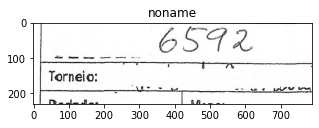

6592
Salva como  C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1\6592_3001_R_part3_scan0590.jpg


In [10]:
#
# passo 2, identifcar o numero
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (5,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()

output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1"
files= glob( os.path.join( output_folder, "9999*.jpg"))
k= len( files)
n= None
for f in files:
    clear_output()
    if n is None or len( n)<= 0:
        print( "Movido para _hold")
    else:
        print( 'Salvo como', ofile)
    img= cv2.imread( f)
    img= img[10:240,10:800]
    print( k, f)
    k-= 1
    showbig( img)
#     print( 'tesseract=>',pytesseract.image_to_string(img))
    n= input()
    if n is None or len( n)<= 0:
        print( "None informado. move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1/_hold')
        time.sleep( 1)
    elif n=='x':
        print( 'bye!')
        break
    else:
        ofile= f.replace( '9999', n.zfill(4)) 
        os.rename( f, ofile)
        print( 'Salva como ', ofile)

In [ ]:
#
# passo 3, renomear para 4 digitos no primeiro bloco
#
files= glob( os.path.join( output_folder, "*.jpg"))
k= len( files)
for f in files:
    p= Path( f)
    t= p.name.split( '_')[0]
    q= t.zfill(4)+'_'
    newf= f.replace( t+'_', q)
    if( newf != f):
        print( f, '=>', newf)
        os.rename( f, newf)

In [ ]:
from shutil import copyfile

In [ ]:
#
# passo 3.1 - limipar fullpage
#

In [12]:
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1"
files= glob( os.path.join( output_folder, "*.jpg"))    
pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
lines= open( pgnfile)
lines10k= [next(lines) for x in range( 10000)]

prev C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1\6722_2958_L_part3_scan0721.jpg
prev ['e4', 'e5', 'Nf3', 'Nc6']


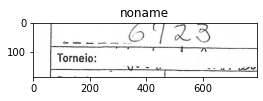

----------------
1 259 C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1\6723_2959_R_part3_scan0721.jpg
['Nf3', 'f5', 'd3', 'Nc6']


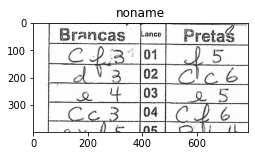

In [13]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (4,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    print( 'prev', _lab)
    if hold:
        print( "Movido para _hold =>", Path(hold).name)
        
    # ---
    n= int( Path( f).name.split( '_')[0])
    # o pgn (n-1)
    lnlabel= lines10k[n-1][8:len(lines10k[n-1])-1]

    img= cv2.imread( f)
    showbig( img[10:200,10:800])
    
    # extrai as primeireas 2 jogadas (para por no nome)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    print( lnlabel.split()[0:4])
    _lab= lnlabel.split()[0:4]

    showbig( img[400:800,10:800])
#     showbig( img[(img.shape[0]-200):img.shape[0],(img.shape[1]-800):img.shape[1]])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted_rep1/_hold')
#         time.sleep( 1)

In [ ]:
#
# pass 3.2 limpar os que estao com a parte inferir cortado
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (4,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted"
files= glob( os.path.join( output_folder, "*.jpg"))
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    if hold:
        print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
    img= cv2.imread( f)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    showbig( img[(img.shape[0]-200):img.shape[0],(img.shape[1]-800):img.shape[1]])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move para hold")
        shutil.move( f, 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted/_hold')


In [ ]:
#
# passo 4 - Criar arquivo de label para cada um dos arquivos
# 

In [21]:
imagesdir= 'C:/mestrado/datasets/handmade/imagens-originais/all_splitted_unified'
dest_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired/images_with_header'
dest_labeldir= 'C:/mestrado/datasets/handmade/imagens-originais/paired/labels'

pgnfile= "C:/mestrado/datasets/handmade/imagens-originais/pgn_30k_eng.txt"
lines= open( pgnfile)
lines10k= [next(lines) for x in range( 10000)]

output_folder= "C:/mestrado/datasets/handmade/imagens-originais/all_splitted_unified"
files= glob( os.path.join( output_folder, "*.jpg"))

In [22]:
print( len( files))

2646


In [23]:
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,10))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
count= 1
for f in files:
#     print( f)
    if count%100== 0:
        print( count)
    count+= 1
    # o numero da jogada..
    n= int( Path( f).name.split( '_')[0])

    # o pgn (n-1)
    lnlabel= lines10k[n-1][8:len(lines10k[n-1])-1]

    # extrai as primeireas 2 jogadas (para por no nome)
    h= ''.join( list( map( lambda x: x.ljust( 4, '_'), lnlabel.split()[0:4])))
    
    # nome do arquivo
    fname= h+Path( f).name

    # fullpath
    labpath= os.path.join( dest_labeldir, fname).replace( '.jpg', '.pgn')
    imgpath= os.path.join( dest_imgdir, fname)

    # salva aquivo de label
#     print( 'label', labpath)
    write_label( labpath, lnlabel)
    # copia arquivo da imagem
#     print( 'image', imgpath)
    shutil.copyfile( f, imgpath)
    
#     print( lnlabel)
#     showbig( cv2.imread( f))    
#     input()
#     clear_output()
print( 'done')

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
done


In [55]:
orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired/images_with_header/_hold'
dest_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/_dataset/images-v6'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [56]:
#
# final step - trim the images
#
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


# w= 335 
w= 310 

count= 1
for f in files:
    # trim
#     clear_output()
    if count%10== 0:
        print( count)
    count+= 1
    
#     clear_output()
    img= cv2.imread( f)
#     show( img)

    img1= img[504:,:]
    img2= np.concatenate((
        img1[:, 3:(3+w)],
        img1[:, 435:(435+w)],
        img1[:, 772:(772+w)],
        img1[:, 1200:(1200+w)]
    ), axis= 1)
#     showsmall( img1[:, 5:(5+w)])
#     showsmall( img1[:, 435:(435+w)])
#     showsmall( img1[:, 772:(772+w)])
#     showsmall( img1[:, 1200:(1200+w)])
    

#     m= input()    
    img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    write_image( os.path.join( dest_imgdir, Path( f).name), img3)


In [25]:
print( 1)

1


prev C:/mestrado/datasets/handmade/imagens-originais/_dataset/images-v6\d4__c5__e3__e6__6755_1355_L_part3_scan0076.jpg
----------------
1 8 C:/mestrado/datasets/handmade/imagens-originais/_dataset/images-v6\d4__d5__c4__c6__0982_0963_L_part2_scan0071.jpg


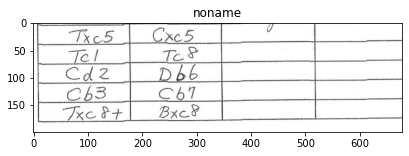

In [57]:
#
# Corrigir as imagens deslocadas
#
#
# pass 3.2 limpar os que estao com a parte inferir cortado
#
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (2,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
original_folder= "C:/mestrado/datasets/handmade/imagens-originais/paired/images_with_header/"
images_folder= "C:/mestrado/datasets/handmade/imagens-originais/_dataset/images-v6"
files= glob( os.path.join( images_folder, "*.jpg"))
k= len( files)
kk= 0
m= None
hold= None
_f= None
_lab= None
for f in files:
    clear_output()
    print( 'prev', _f)
    if hold:
        print( "MOVIDO PARA -HOLD =>", Path(hold).name)
        
    img= cv2.imread( f)
    print( '----------------')
    print( k, kk, f)
    k-= 1
    kk+= 1

    showbig( img[(img.shape[0]-200):img.shape[0],:])

    m= input()
    _f= f
    hold= None
    if m is None or len( m)<= 0:
        pass
    elif m=='x':
        print( 'bye!')
        break
    else:
        hold= f
        print( "move original para hold")
        shutil.move( 
            os.path.join( original_folder, Path(f).name), 
            os.path.join( original_folder, '_hold'))

In [ ]:
#
# Rever as imagens do torneio (deixar identificavel pelo nome) para poder juntar com o dataset manual
# Remover todos com erro, ou ilegíveis. Deixar somente os perfeitamente legiveis, com 0 erro
#
